Iterações Golden Section: 32
[1.0556091406917392, 6.282143370725494]


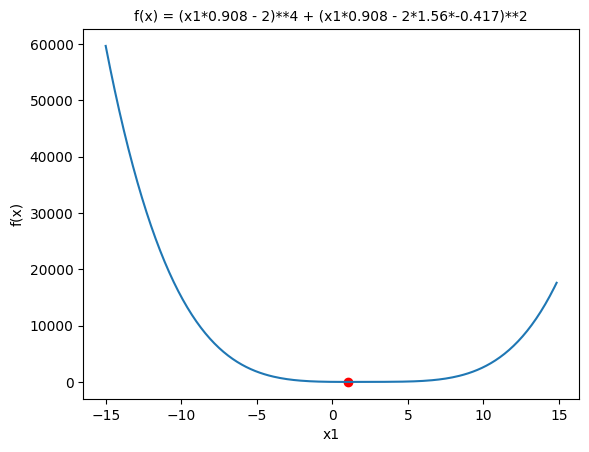

In [8]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def restriction1(n):
  """Restrição de n >= 0"""
  penalty = 10e12
  # n >= 1 => n - 1 >= 0 => -n + 1 <= 0
  function = "-n + 1.0"

  return penalty * (max([0, eval(function, {"__builtins__": {}, "n": n}, ALLOWED_NAMES)])**2)

def f(function, testValue):
  return eval(function, {"__builtins__": {}, "x1": testValue}, ALLOWED_NAMES) + restriction1(testValue)

def plot2D(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("f(x)")
    x1 = np.arange(-range, range, 0.15)
    z = [eval(function, {"__builtins__": {}, "x1": x1}, ALLOWED_NAMES) for x1 in x1]

    ax.plot(x1, z, label=f'f(x) = {function}')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

def goldenSectionSearch(function, interval, x):
  [a, b] = interval
  goldenRatio = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 1000
  xa, xb = 0, 0

  while time < timeout:
    p = goldenRatio * (b - a)
    xa = a + p
    xb = b - p
    fxa = f(function, xa)
    fxb = f(function, xb)

    if math.fabs(xb - xa) < e:
      break

    if fxa >= fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1
  print(f"Iterações Golden Section: {time}")
  return [xa, fxa]


function = "(x1*0.908 - 2)**4 + (x1*0.908 - 2*1.56*-0.417)**2" #x1 equivale a n e x2 equivale a r

min = goldenSectionSearch(function, [-10, 10], 2)

print(min)

plot2D(function, min, 15)